In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import seaborn as sns
print(sys.version)
pd.set_option('display.max_columns', 500)

import bokeh
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


In [2]:
df_air=pd.read_csv('2015_Air_quality_in_northern_Taiwan.csv', encoding="unicode_escape")


In [3]:
sampled_data = df_air.sample(n=10000, random_state=42)

# Save the sampled data to a new CSV file
sampled_data.to_csv('airqualtaiwan302320.csv', index=False)

In [4]:
taiwan_air_quality=pd.read_csv('airqualtaiwan302320.csv', encoding="unicode_escape")

In [5]:
taiwan_air_quality.head()

,time,station,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PH_RAIN,PM10,PM2.5,RAINFALL,RAIN_COND,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,2015/05/09 14:00,Zhongli,30,1.9,0.78,0.22,17,14,31,18,NaN,56,19,NR,NaN,68,2,2.1,NaN,115,99,1.9,0.5
1,2015/08/24 15:00,Wanhua,33,NaN,0.35,NaN,2.8,11,14,49,NaN,26,22,NR,NaN,58,2.6,NaN,NaN,273,277,4.4,3.6
2,2015/12/02 07:00,Tamsui,NaN,NaN,0.59,NaN,14,23,37,3.1,NaN,28,9,NaN,NaN,NaN,4.1,NaN,0.1,NaN,NaN,NaN,NaN
3,2015/10/02 21:00,Banqiao,27,2,0.71,0.18,1,24,25,20,NR,38,13,NR,NR,80,2.2,2.1,0,61,60,2.6,2.8
4,2015/04/17 03:00,Guanyin,20,NaN,0.45,NaN,3.1,46,49,7.7,NR,99,38,NR,NR,77,19,NaN,NaN,110,117,2,1.3


In [6]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['AMB_TEMP'] = pd.to_numeric(taiwan_air_quality['AMB_TEMP'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['AMB_TEMP'].fillna(taiwan_air_quality['AMB_TEMP'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['AMB_TEMP'].dtype)
print(taiwan_air_quality['AMB_TEMP'].unique())

float64
[30.         33.         23.40333115 27.         20.         32.
 26.         17.         15.         16.         25.         22.
 28.         23.         31.         18.         19.         34.
 21.         24.         29.         12.         13.         14.
 35.         11.          9.6         9.5        37.          9.3
  6.1         8.9         0.31       36.          8.7        56.
 10.          7.9         9.7         7.6         0.2         9.9
  0.17        9.2         3.5         8.6         4.4         9.1
  6.4         8.4         7.5         0.5         0.47        0.4
  9.8         6.6         9.4         8.5         0.16        5.7
  8.3         3.8         5.3         7.3         8.8         4.3
  4.8         4.1         0.33        0.3         8.2       ]


In [7]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['CH4'] = pd.to_numeric(taiwan_air_quality['CH4'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['CH4'].fillna(taiwan_air_quality['CH4'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['CH4'].dtype)
print(taiwan_air_quality['CH4'].unique())

float64
[1.9        1.93934659 2.         2.1        1.8        1.7
 2.4        1.6        3.1        2.3        2.2        2.5
 2.8        2.7        2.6        3.3        3.         1.5
 3.4        2.9        3.6        3.7        4.1        4.2       ]


In [8]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['CO'] = pd.to_numeric(taiwan_air_quality['CO'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['CO'].fillna(taiwan_air_quality['CO'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['CO'].dtype)
print(taiwan_air_quality['CO'].unique())

float64
[ 0.78        0.35        0.59        0.71        0.45        0.29
  0.53        0.56        0.26        1.06        1.1         0.47
  0.63        0.3         0.56404446  0.74        0.31        0.27
  0.41        0.18        0.57        0.97        0.4         0.75
  0.23        0.48        0.82        0.73        0.46        0.54
  0.7         0.37        0.11        0.22        0.5         0.66
  1.81        0.2         0.09        0.15        1.28        0.91
  0.34        0.44        0.88        0.94        1.51        0.25
  2.69        1.36        0.8         0.52        0.84        0.76
  0.24        0.43        0.13        2.24        1.15        1.21
  0.99        0.16        0.42        0.64        0.85        1.59
  1.33        0.28        2.06        1.84        0.95        0.33
  0.21        0.96        0.65        0.61        0.39        1.25
  0.49        0.32        0.17        0.6         0.69        0.77
  1.19        1.09        0.79        0.83        0.14

In [9]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['NMHC'] = pd.to_numeric(taiwan_air_quality['NMHC'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['NMHC'].fillna(taiwan_air_quality['NMHC'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['NMHC'].dtype)
print(taiwan_air_quality['NMHC'].unique())

float64
[ 0.22        0.26832623  0.18        0.39        0.07        0.12
  0.38        0.21        0.08        0.3         1.14        0.47
  0.4         0.06        0.05        0.81        0.02        0.26
  0.68        0.29        0.11        0.14        0.2         0.01
  0.91        0.44        0.28        0.13        0.33        0.1
  0.34        0.27        0.19        1.11        0.61        0.63
  0.16        0.37        0.35        0.23        0.41        0.03
  0.17        0.48        0.57        0.54        0.82        0.25
  1.35        0.5         0.32        0.53        0.8         0.15
  0.04        0.45        0.64        1.09        0.09        0.49
  0.56        0.85        0.58        0.36        0.84        0.7
  0.62        0.31        1.29        0.          0.24        0.72
  0.78       -0.01        0.65        0.88        0.9         1.79
  0.93        0.46        0.43        0.51        0.76        0.59
  0.67        0.52        1.74        1.18        0.6   

In [10]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['NO'] = pd.to_numeric(taiwan_air_quality['NO'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['NO'].fillna(taiwan_air_quality['NO'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['NO'].dtype)
print(taiwan_air_quality['NO'].unique())

float64
[ 1.7000000e+01  2.8000000e+00  1.4000000e+01  1.0000000e+00
  3.1000000e+00  2.7000000e+00  2.4000000e+00  6.0000000e-01
  1.6000000e+01  4.8000000e+01  7.0000000e-01  3.8000000e+00
  4.3000000e+00  8.8633991e+00  2.7000000e+01  5.2000000e+00
  1.7000000e+00  1.8000000e+00  2.5000000e+00  7.5000000e+00
  1.5000000e+01  3.5000000e+00  2.9000000e+00  3.9000000e+00
  5.1000000e+00  1.5000000e+00  1.4000000e+00  6.7000000e+01
  8.0000000e-01  1.2000000e+00  6.5000000e+00  1.9000000e+00
  3.0000000e+00  3.1000000e+01  3.4000000e+00  6.8000000e+01
  5.0000000e-01  1.1000000e+01  1.1000000e+00  2.0000000e+01
  1.0800000e+02  8.2000000e+00  1.2000000e+01  4.9000000e+00
  2.2000000e+00  3.7000000e+01  4.0000000e-01  3.3000000e+01
  3.4000000e+01  2.0000000e+00  1.6000000e+00  8.6000000e+00
  3.6000000e+00  8.1000000e+00  1.0000000e+01  3.0000000e+01
  5.9000000e+01  1.3200000e+02  8.2000000e+01  2.3000000e+00
  6.3000000e+00  7.2000000e+00  6.1000000e+00  4.7000000e+00
  1.3000000e+00 

In [11]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['NO2'] = pd.to_numeric(taiwan_air_quality['NO2'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['NO2'].fillna(taiwan_air_quality['NO2'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['NO2'].dtype)
print(taiwan_air_quality['NO2'].unique())

float64
[14.         11.         23.         24.         46.         25.
  7.2         9.1        38.         34.          3.8        27.
  9.5        17.78782367 30.          6.7         7.3        19.
  8.         31.          5.1         9.8        17.         21.
 40.         26.         16.          1.8        29.          2.6
  2.7        35.          7.5         5.9        20.          4.6
 68.          9.         42.          3.6        36.          3.5
 32.          5.4        18.          4.         22.         13.
  8.4         1.1        51.         41.         43.          9.9
 15.          6.6        12.          7.4         4.3         7.9
  0.3         5.2        10.          8.5         6.1         8.7
 28.          5.6        37.          0.7         1.5         8.6
 44.          2.9         3.2         6.2         5.5         9.4
 49.          3.4         5.3         6.3         4.1         9.6
  6.8         4.9         3.1         7.7         3.3         2.5
  2.4  

In [12]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['NOx'] = pd.to_numeric(taiwan_air_quality['NOx'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['NOx'].fillna(taiwan_air_quality['NOx'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['NOx'].dtype)
print(taiwan_air_quality['NOx'].unique())

float64
[ 31.          14.          37.          25.          49.
  27.           7.8          9.7         54.          82.
   4.5         26.61956432  57.          12.           9.
  21.          10.          28.          38.           5.8
  42.          11.          23.          55.          29.
  20.          30.           3.3         48.          15.
  34.         101.           3.8          7.4         41.
   9.5          8.8         18.           5.6         98.
 110.           4.1          4.7         50.         141.
   7.2         26.          16.          13.           5.1
  60.          24.           1.5         84.          88.
  77.          45.          44.          59.          97.
  17.         164.           4.3         99.          32.
   9.4         47.          22.          39.          43.
   1.4          6.2          7.6          5.9         19.
   1.          36.           1.8         69.          58.
   8.3          3.4          4.4         62.           6.3
  5

In [13]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['O3'] = pd.to_numeric(taiwan_air_quality['O3'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['O3'].fillna(taiwan_air_quality['O3'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['O3'].dtype)
print(taiwan_air_quality['O3'].unique())

float64
[ 1.80000000e+01  4.90000000e+01  3.10000000e+00  2.00000000e+01
  7.70000000e+00  4.70000000e+01  3.20000000e+01  3.90000000e+01
  3.30000000e+01  1.30000000e+01  2.90289474e+01  5.70000000e+01
  3.30000000e+00  1.20000000e+01  4.00000000e+01  4.10000000e+01
  2.10000000e+00  3.50000000e+01  9.80000000e+00  4.70000000e+00
  2.30000000e+01  4.80000000e+01  2.90000000e+01  5.30000000e+01
  1.10000000e+01  5.90000000e+01  7.90000000e+01  4.10000000e+00
  8.60000000e+01  5.00000000e-01  3.10000000e+01  3.80000000e+01
  3.00000000e+01  9.30000000e+00  6.60000000e+00  9.60000000e+00
  2.20000000e+01  2.60000000e+01  9.50000000e+01  4.20000000e+01
  5.30000000e+00  2.50000000e+01  4.40000000e+01  7.50000000e+00
  5.40000000e+01  3.60000000e+01  2.00000000e+00  3.20000000e+00
  1.00000000e+00  4.30000000e+01  3.40000000e+01  7.10000000e+00
  4.50000000e+01  8.30000000e+00  1.50000000e+01  1.70000000e+01
  9.00000000e+00  2.30000000e+00  1.60000000e+01  7.10000000e+01
  5.20000000e+00 

In [14]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['PH_RAIN'] = pd.to_numeric(taiwan_air_quality['PH_RAIN'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['PH_RAIN'].fillna(taiwan_air_quality['PH_RAIN'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['PH_RAIN'].dtype)
print(taiwan_air_quality['PH_RAIN'].unique())

float64
[4.64705882 4.5        4.2        4.         6.4        5.9
 4.6        4.3        4.4        4.9        4.1        5.
 6.         5.4        5.7        5.2        4.7        5.3
 3.9        5.1        5.6        4.8        3.7        5.8
 6.7        3.6        5.5        3.8        6.3        6.1       ]


In [15]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['PM10'] = pd.to_numeric(taiwan_air_quality['PM10'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['PM10'].fillna(taiwan_air_quality['PM10'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['PM10'].dtype)
print(taiwan_air_quality['PM10'].unique())

float64
[ 56.          26.          28.          38.          99.
  48.          42.          41.          31.          78.
  53.          46.          12.          30.          41.85819121
  11.          27.          40.          21.          77.
  22.          34.          51.          72.          66.
  13.          44.          94.          33.          92.
  29.          18.          36.          89.          32.
  23.          59.          75.         143.          49.
  35.           4.          60.          85.          39.
  64.          61.          74.          15.          84.
  37.          68.          54.          24.          14.
  65.          52.          70.          17.           3.
  20.          55.         126.          80.          57.
  16.          43.          67.         146.          45.
  62.         123.         101.          25.          58.
  19.          81.          50.         128.         141.
  10.         103.          91.          47.         100

In [16]:

# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['PM2.5'] = pd.to_numeric(taiwan_air_quality['PM2.5'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['PM2.5'].fillna(taiwan_air_quality['PM2.5'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['PM2.5'].dtype)
print(taiwan_air_quality['PM2.5'].unique())

float64
[ 19.          22.           9.          13.          38.
  30.          21.          25.           6.          41.
  12.          37.           8.          18.66170546  18.
  20.          11.          27.           5.          44.
  24.          17.          15.          28.          35.
   3.          36.          32.           0.          16.
  49.          14.          54.           2.          31.
  33.          87.          10.          43.          48.
  45.          40.           1.          29.           4.
   7.          23.          26.          60.          34.
  76.          64.          56.          92.          39.
  53.          47.          52.          57.          51.
  71.          62.          68.          58.          66.
  82.          42.           2.2         46.          50.
  75.          83.          73.          55.          59.
  63.          79.          69.          86.          67.
  70.          61.           3.8         77.           2.3
  84.

In [17]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['RAINFALL'] = pd.to_numeric(taiwan_air_quality['RAINFALL'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['RAINFALL'].fillna(taiwan_air_quality['RAINFALL'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['RAINFALL'].dtype)
print(taiwan_air_quality['RAINFALL'].unique())

float64
[4.72244508e+00 8.00000000e-01 8.90000000e+01 2.00000000e+00
 1.30000000e+01 3.60000000e+00 1.20000000e+00 2.00000000e-01
 5.20000000e+00 1.50000000e+01 1.40000000e+00 2.80000000e+00
 4.60000000e+01 4.00000000e-01 1.00000000e+00 3.60000000e+01
 1.60000000e+00 2.40000000e+00 3.00000000e+00 1.80000000e+00
 9.20000000e+00 7.00000000e+00 1.10000000e+01 2.60000000e+00
 6.00000000e-01 2.60000000e+01 9.00000000e+00 4.80000000e+00
 2.20000000e+00 4.00000000e+00 1.60000000e+01 8.20000000e+01
 9.40000000e+00 4.60000000e+00 9.60000000e+00 3.90000000e+01
 9.80000000e+01 1.20000000e+01 3.40000000e+00 2.20000000e+01
 9.80000000e+00 3.20000000e+00 6.10000000e+01 4.20000000e+00
 8.10000000e+01 1.40000000e+01 4.80000000e+01 3.40000000e+01
 4.10000000e+01 4.40000000e+00 6.80000000e+01 7.60000000e+00
 1.66000000e+02 3.80000000e+01 6.60000000e+01 7.90000000e+01
 1.00000000e+01 6.20000000e+00 5.60000000e+00 6.00000000e+00
 3.80000000e+00 5.20000000e+01 6.40000000e+00 6.70000000e+01
 8.20000000e+00 

In [18]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['RAIN_COND'] = pd.to_numeric(taiwan_air_quality['RAIN_COND'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['RAIN_COND'].fillna(taiwan_air_quality['RAIN_COND'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['RAIN_COND'].dtype)
print(taiwan_air_quality['RAIN_COND'].unique())

float64
[  59.47529412   10.           44.           57.            5.8
  340.           11.           54.           21.            7.9
   92.            3.9           3.4           4.            6.
    7.6           7.3           9.9          40.            4.1
   14.          182.            6.8           4.8          39.
   15.           36.            7.2         119.            3.5
  104.           16.           27.            4.6          99.
    5.           64.            9.2           9.4          18.
   73.           50.            3.8         151.            6.6
  153.           37.            5.2         127.           48.
  187.           51.           33.           72.           12.
   46.          105.           32.          171.          106.
   30.          192.            7.8         114.           63.
 1170.           17.            7.7          70.           20.
    7.1           5.6           6.3          19.          343.
    9.5          42.           55.        

In [19]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['RH'] = pd.to_numeric(taiwan_air_quality['RH'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['RH'].fillna(taiwan_air_quality['RH'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['RH'].dtype)
print(taiwan_air_quality['RH'].unique())

float64
[ 68.          58.          75.88233107  80.          77.
  64.          88.          82.          51.          94.
  81.          79.          72.          84.          70.
  54.          78.          66.          69.          92.
  91.          57.          59.          85.         100.
  76.           4.4         87.          75.          49.
  73.          32.          83.          95.          55.
  89.          71.          62.          45.          99.
  67.          46.          86.          74.          97.
  65.          98.          60.          90.          56.
  43.          93.          50.           2.5         48.
  96.          63.          61.          41.           3.8
  39.          52.          47.          42.          44.
  53.           1.6         40.          37.           2.4
   3.           0.8         34.          23.           3.1
  36.           1.8         16.          11.          35.
   0.5          0.7          2.           5.3          4.1
  

In [20]:

# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['SO2'] = pd.to_numeric(taiwan_air_quality['SO2'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['SO2'].fillna(taiwan_air_quality['SO2'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['SO2'].dtype)
print(taiwan_air_quality['SO2'].unique())

float64
[ 2.00000000e+00  2.60000000e+00  4.10000000e+00  2.20000000e+00
  1.90000000e+01  3.90000000e+00  8.50000000e+00  1.90000000e+00
  1.70000000e+00  5.10000000e+00  1.80000000e+00  7.00000000e-01
  2.10000000e+00  1.30000000e+00  3.58456701e+00  6.50000000e+00
  1.10000000e+00  1.00000000e+00  2.30000000e+00  3.20000000e+00
  1.60000000e+00  4.30000000e+00  2.50000000e+00  3.70000000e+00
  4.00000000e+00  6.20000000e+00  9.00000000e-01  4.80000000e+00
  2.70000000e+00  9.50000000e+00  1.50000000e+00  3.00000000e-01
  3.10000000e+00  1.40000000e+00  5.40000000e+00  4.70000000e+00
  2.80000000e+00  4.20000000e+00  1.40000000e+01  6.70000000e+00
  1.30000000e+01  3.30000000e+00  4.90000000e+00  3.00000000e+00
  3.80000000e+00  3.40000000e+00  8.70000000e+00  3.50000000e+00
  2.40000000e+00  1.10000000e+01  6.00000000e+00  2.90000000e+00
  1.20000000e+00  7.40000000e+00  7.00000000e+00  5.80000000e+00
  8.00000000e-01  7.10000000e+00  7.70000000e+00  3.60000000e+00
  5.70000000e+00 

In [21]:

# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['THC'] = pd.to_numeric(taiwan_air_quality['THC'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['THC'].fillna(taiwan_air_quality['THC'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['THC'].dtype)
print(taiwan_air_quality['THC'].unique())

float64
[2.1        2.20783617 2.5        2.         1.9        2.2
 1.8        2.3        3.5        2.4        1.7        2.8
 3.8        2.9        3.4        2.6        1.6        3.1
 3.         2.7        3.6        3.2        4.         3.3
 4.4        3.7        3.9        4.3        4.5        4.8       ]


In [22]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['UVB'] = pd.to_numeric(taiwan_air_quality['UVB'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['UVB'].fillna(taiwan_air_quality['UVB'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['UVB'].dtype)
print(taiwan_air_quality['UVB'].unique())

float64
[ 1.36394148  0.1         0.          0.9         0.7         7.
  4.          7.9         2.7         0.2         0.3         2.
  1.7         6.5         2.1         5.8         5.3         3.6
  4.2         7.2         9.3         4.4         9.8         1.1
  9.2         2.6         4.1         8.9         1.3         4.7
  0.6         4.9         0.5         7.5         2.9         3.
  3.8         4.5         0.4         3.7         1.8         2.3
  3.1         4.6         1.5         5.2         3.5         5.6
  1.9        10.          5.7         7.1         7.3         4.3
  9.9         1.          3.9         6.3         7.4         1.4
  2.8         8.6         6.9         5.9         3.3         1.6
  2.2         6.1         8.8         0.8         3.2         7.7
  2.5         1.2         6.7         5.          6.8         8.4
  8.3         5.4         2.4         3.4         8.5         7.6
  6.          4.8         9.7         6.6         6.2         7.8
  9. 

In [23]:

# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['WD_HR'] = pd.to_numeric(taiwan_air_quality['WD_HR'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['WD_HR'].fillna(taiwan_air_quality['WD_HR'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['WD_HR'].dtype)
print(taiwan_air_quality['WD_HR'].unique())

float64
[115.         273.         146.52239521  61.         110.
 241.          85.          54.          51.          78.
  19.         180.          79.          66.         149.
  53.         179.         254.         240.         267.
 169.          89.         118.         306.          38.
 177.         101.         105.         249.         294.
  56.         290.          76.         125.         238.
  50.         253.         274.          46.         215.
 158.          83.         300.         208.          82.
  92.         127.         236.         135.         132.
  52.         250.          74.          41.         161.
 315.          99.          43.         181.          67.
 186.         220.         283.         308.         193.
  94.         120.          84.          80.         268.
 201.          91.         313.         205.         242.
 226.         123.          69.         145.          73.
  81.         247.         141.         176.         276.
 280. 

In [24]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['WD_HR'] = pd.to_numeric(taiwan_air_quality['WD_HR'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['WD_HR'].fillna(taiwan_air_quality['WD_HR'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['WD_HR'].dtype)
print(taiwan_air_quality['WD_HR'].unique())

float64
[115.         273.         146.52239521  61.         110.
 241.          85.          54.          51.          78.
  19.         180.          79.          66.         149.
  53.         179.         254.         240.         267.
 169.          89.         118.         306.          38.
 177.         101.         105.         249.         294.
  56.         290.          76.         125.         238.
  50.         253.         274.          46.         215.
 158.          83.         300.         208.          82.
  92.         127.         236.         135.         132.
  52.         250.          74.          41.         161.
 315.          99.          43.         181.          67.
 186.         220.         283.         308.         193.
  94.         120.          84.          80.         268.
 201.          91.         313.         205.         242.
 226.         123.          69.         145.          73.
  81.         247.         141.         176.         276.
 280. 

In [25]:
# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['WIND_DIREC'] = pd.to_numeric(taiwan_air_quality['WIND_DIREC'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['WIND_DIREC'].fillna(taiwan_air_quality['WIND_DIREC'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['WIND_DIREC'].dtype)
print(taiwan_air_quality['WIND_DIREC'].unique())

float64
[9.90000000e+01 2.77000000e+02 1.46884725e+02 6.00000000e+01
 1.17000000e+02 2.58000000e+02 4.50000000e+01 5.50000000e+01
 5.00000000e+01 7.10000000e+01 1.10000000e+02 1.79000000e+02
 7.20000000e+01 2.93000000e+02 1.50000000e+02 4.80000000e+01
 1.86000000e+02 2.38000000e+02 2.06000000e+02 2.70000000e+02
 1.59000000e+02 9.30000000e+01 1.23000000e+02 3.10000000e+02
 4.30000000e+01 2.23000000e+02 9.50000000e+01 2.52000000e+02
 3.09000000e+02 4.60000000e+01 2.91000000e+02 7.90000000e+01
 1.27000000e+02 2.39000000e+02 5.10000000e+01 2.48000000e+02
 3.23000000e+02 2.25000000e+02 3.19000000e+02 8.70000000e+01
 3.01000000e+02 2.21000000e+02 8.60000000e+01 1.60000000e+02
 2.45000000e+02 3.10000000e+01 1.37000000e+02 1.49000000e+02
 5.20000000e+01 1.08000000e+02 2.51000000e+02 8.30000000e+01
 1.11000000e+02 3.18000000e+02 1.93000000e+02 6.70000000e+01
 2.05000000e+02 8.80000000e+01 6.80000000e+01 2.01000000e+02
 1.24000000e+02 8.00000000e+01 3.39000000e+02 2.73000000e+02
 1.15000000e+02 

In [26]:

# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['WIND_SPEED'] = pd.to_numeric(taiwan_air_quality['WIND_SPEED'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['WIND_SPEED'].fillna(taiwan_air_quality['WIND_SPEED'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['WIND_SPEED'].dtype)
print(taiwan_air_quality['WIND_SPEED'].unique())

float64
[ 1.9         4.4         2.44361702  2.6         2.          2.7
  1.8         2.3         4.8         1.7         0.4         2.1
  1.3         5.8         1.2         5.7         2.2         3.6
  0.9         3.          0.7         0.5         5.3         6.9
  0.6         3.7         3.3         1.1         5.1         3.5
  3.1         2.9         3.8         4.7         1.          2.8
  2.5         1.4         0.8         4.          1.6         2.4
  7.7         1.5         4.5         5.2         3.2         6.7
  5.5         7.9         4.6         4.9         4.3         3.4
  7.3         3.9         5.9         6.4         8.8         6.5
  6.1         7.1         7.4         5.          6.8         4.2
  8.4         7.5         8.6         8.         10.          5.6
  7.6        11.          5.4         4.1         6.3         7.
 50.          6.          9.9         8.5         6.2         6.6
  7.8         7.2         8.1        16.         14.          8.2
  8

In [27]:

# Convert to numeric values and replace invalid values with NaN
taiwan_air_quality['WS_HR'] = pd.to_numeric(taiwan_air_quality['WS_HR'], errors='coerce')

# Replace NaN values with the mean temperature
taiwan_air_quality['WS_HR'].fillna(taiwan_air_quality['WS_HR'].mean(), inplace=True)

# Print the data type and unique values of AMB_TEMP
print(taiwan_air_quality['WS_HR'].dtype)
print(taiwan_air_quality['WS_HR'].unique())

float64
[ 0.5         3.6         2.02260151  2.8         1.3         2.5
  1.5         2.4         4.3         0.1         1.8         1.4
  1.7         4.7         1.          5.1         1.2         2.2
  0.6         2.1         0.7         0.2         1.1         1.6
  0.9         0.8         4.5         7.1         1.9         0.4
  2.          3.          4.9         3.9         2.3         3.4
  4.1         2.6         4.8         0.          3.8         6.8
  2.7         6.1         2.9         0.3         7.9         6.
  3.3         6.4         5.          3.2         3.7         4.
  4.2         3.1         4.6         5.4         5.9         5.8
  3.5         8.9         7.          5.5         7.3         6.7
  4.4         6.6         6.3         6.5         7.2         9.7
 10.          8.7         7.8         5.7         5.2         8.2
 30.          5.6         8.          6.9        50.          7.4
  9.1         5.3         8.4        17.          9.4         7.5
 14.

In [28]:
taiwan_air_quality['AMB_TEMP'] = taiwan_air_quality['AMB_TEMP'].apply(lambda x: '{:.2f}'.format(x))

taiwan_air_quality['CH4'] = taiwan_air_quality['CH4'].apply(lambda x: '{:.2f}'.format(x))

taiwan_air_quality['CO'] = taiwan_air_quality['CO'].apply(lambda x: '{:.2f}'.format(x))

taiwan_air_quality['NMHC'] = taiwan_air_quality['NMHC'].apply(lambda x: '{:.2f}'.format(x))

taiwan_air_quality['NO'] = taiwan_air_quality['NO'].apply(lambda x: '{:.2f}'.format(x))
taiwan_air_quality['NO2'] = taiwan_air_quality['NO2'].apply(lambda x: '{:.2f}'.format(x))
taiwan_air_quality['NOx'] = taiwan_air_quality['NOx'].apply(lambda x: '{:.2f}'.format(x))
taiwan_air_quality['O3'] = taiwan_air_quality['O3'].apply(lambda x: '{:.2f}'.format(x))
taiwan_air_quality['PH_RAIN'] = taiwan_air_quality['PH_RAIN'].apply(lambda x: '{:.2f}'.format(x))
taiwan_air_quality['PM10'] = taiwan_air_quality['PM10'].apply(lambda x: '{:.2f}'.format(x))
taiwan_air_quality['PM2.5'] = taiwan_air_quality['PM2.5'].apply(lambda x: '{:.2f}'.format(x))
taiwan_air_quality['RAIN_COND'] = taiwan_air_quality['RAIN_COND'].apply(lambda x: '{:.2f}'.format(x))
taiwan_air_quality['RH'] = taiwan_air_quality['RH'].apply(lambda x: '{:.2f}'.format(x))

taiwan_air_quality['SO2'] = taiwan_air_quality['SO2'].apply(lambda x: '{:.2f}'.format(x))
taiwan_air_quality['THC'] = taiwan_air_quality['THC'].apply(lambda x: '{:.2f}'.format(x))
taiwan_air_quality['UVB'] = taiwan_air_quality['UVB'].apply(lambda x: '{:.2f}'.format(x))
taiwan_air_quality['WD_HR'] = taiwan_air_quality['WD_HR'].apply(lambda x: '{:.2f}'.format(x))

taiwan_air_quality['WIND_DIREC'] = taiwan_air_quality['WIND_DIREC'].apply(lambda x: '{:.2f}'.format(x))


taiwan_air_quality['WIND_SPEED'] = taiwan_air_quality['WIND_SPEED'].apply(lambda x: '{:.2f}'.format(x))
taiwan_air_quality['WS_HR'] = taiwan_air_quality['WS_HR'].apply(lambda x: '{:.2f}'.format(x))


In [32]:
# Compute correlation matrix
correlation_matrix = taiwan_air_quality.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Customize plot
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x1000 with 0 Axes>

In [31]:
taiwan_air_quality.drop('RAINFALL', axis=1, inplace=True)


In [33]:
taiwan_air_quality.head()

,time,station,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PH_RAIN,PM10,PM2.5,RAIN_COND,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,2015/05/09 14:00,Zhongli,30.00,1.90,0.78,0.22,17.00,14.00,31.00,18.00,4.65,56.00,19.00,59.48,68.00,2.00,2.10,1.36,115.00,99.00,1.90,0.50
1,2015/08/24 15:00,Wanhua,33.00,1.94,0.35,0.27,2.80,11.00,14.00,49.00,4.65,26.00,22.00,59.48,58.00,2.60,2.21,1.36,273.00,277.00,4.40,3.60
2,2015/12/02 07:00,Tamsui,23.40,1.94,0.59,0.27,14.00,23.00,37.00,3.10,4.65,28.00,9.00,59.48,75.88,4.10,2.21,0.10,146.52,146.88,2.44,2.02
3,2015/10/02 21:00,Banqiao,27.00,2.00,0.71,0.18,1.00,24.00,25.00,20.00,4.65,38.00,13.00,59.48,80.00,2.20,2.10,0.00,61.00,60.00,2.60,2.80
4,2015/04/17 03:00,Guanyin,20.00,1.94,0.45,0.27,3.10,46.00,49.00,7.70,4.65,99.00,38.00,59.48,77.00,19.00,2.21,1.36,110.00,117.00,2.00,1.30


In [34]:
taiwan_air_quality.drop('AMB_TEMP', axis=1, inplace=True)
taiwan_air_quality.drop('NMHC', axis=1, inplace=True)
taiwan_air_quality.drop('PH_RAIN', axis=1, inplace=True)
taiwan_air_quality.drop('RAIN_COND', axis=1, inplace=True)
taiwan_air_quality.drop('RH', axis=1, inplace=True)
taiwan_air_quality.drop('THC', axis=1, inplace=True)
taiwan_air_quality.drop('UVB', axis=1, inplace=True)
taiwan_air_quality.drop('WD_HR', axis=1, inplace=True)
taiwan_air_quality.drop('WIND_DIREC', axis=1, inplace=True)
taiwan_air_quality.drop('WIND_SPEED', axis=1, inplace=True)
taiwan_air_quality.drop('WS_HR', axis=1, inplace=True)



In [35]:
taiwan_air_quality['SO2'] = pd.to_numeric(taiwan_air_quality['SO2'], errors='coerce')


In [36]:
taiwan_air_quality['NO2'] = pd.to_numeric(taiwan_air_quality['NO2'], errors='coerce')


In [37]:
taiwan_air_quality['CH4'] = pd.to_numeric(taiwan_air_quality['CH4'], errors='coerce')


In [38]:
taiwan_air_quality['CO'] = pd.to_numeric(taiwan_air_quality['CO'], errors='coerce')


In [39]:
taiwan_air_quality['NO'] = pd.to_numeric(taiwan_air_quality['NO'], errors='coerce')



In [40]:
taiwan_air_quality['NOx'] = pd.to_numeric(taiwan_air_quality['NOx'], errors='coerce')


In [41]:
taiwan_air_quality['O3'] = pd.to_numeric(taiwan_air_quality['O3'], errors='coerce')



In [42]:
taiwan_air_quality['PM10'] = pd.to_numeric(taiwan_air_quality['PM10'], errors='coerce')


In [43]:
taiwan_air_quality['PM2.5'] = pd.to_numeric(taiwan_air_quality['PM2.5'], errors='coerce')



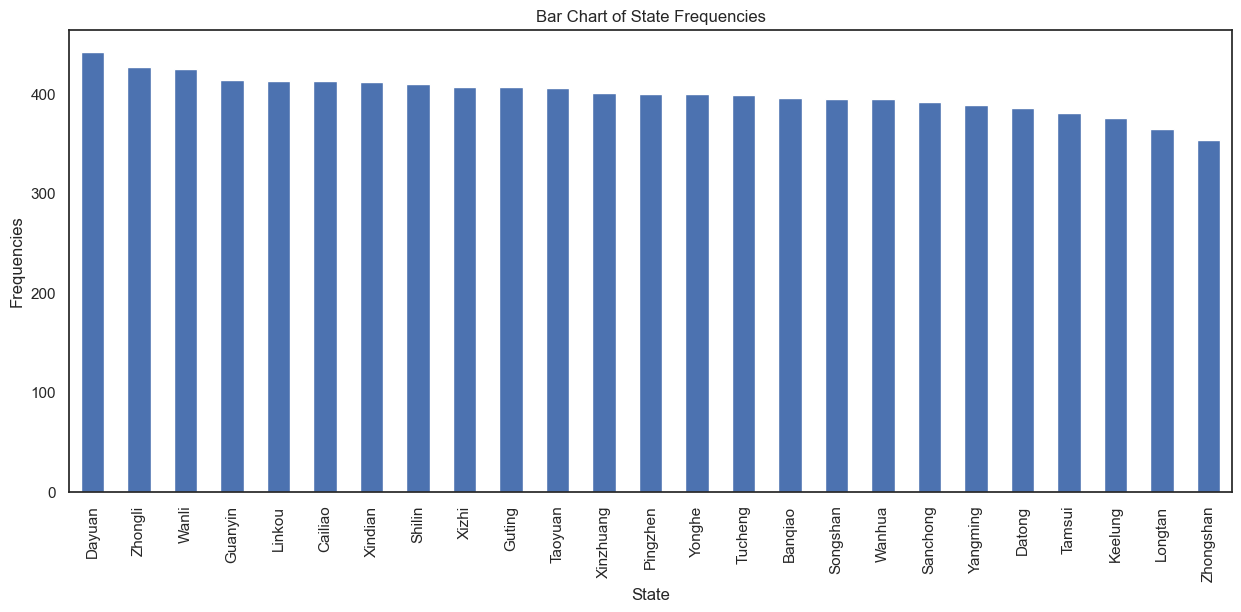

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.xticks(rotation=90)

taiwan_air_quality['station'].value_counts().plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Frequencies')
plt.title('Bar Chart of State Frequencies')

plt.show()

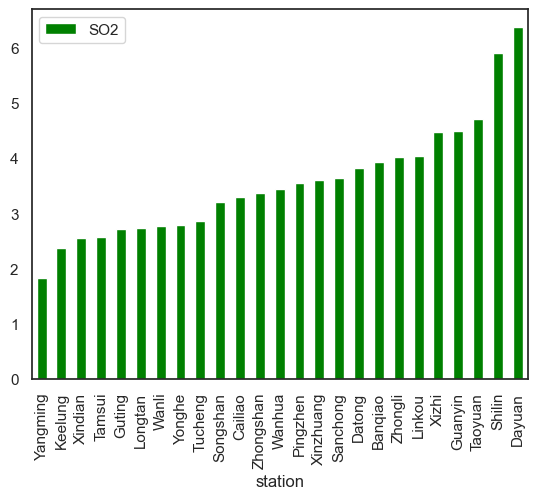

In [45]:
taiwan_air_quality[['SO2', 'station']].groupby(["station"]).mean().sort_values(by='SO2').plot.bar(color='green')
plt.show()

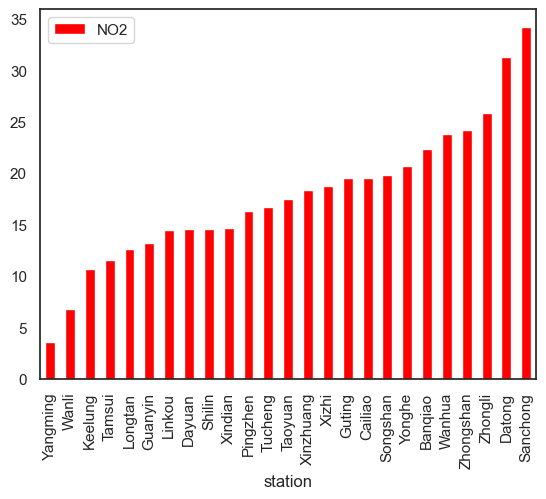

In [46]:
taiwan_air_quality[['NO2', 'station']].groupby(["station"]).mean().sort_values(by='NO2').plot.bar(color='red')
plt.show()

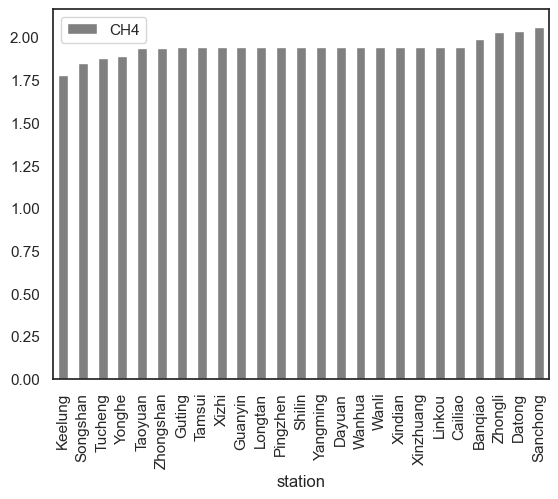

In [47]:
taiwan_air_quality[['CH4', 'station']].groupby(["station"]).mean().sort_values(by='CH4').plot.bar(color='gray')
plt.show()

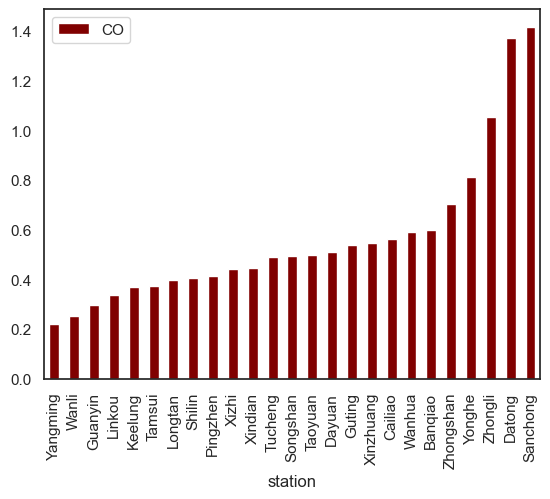

In [48]:
taiwan_air_quality[['CO', 'station']].groupby(["station"]).mean().sort_values(by='CO').plot.bar(color='maroon')
plt.show()

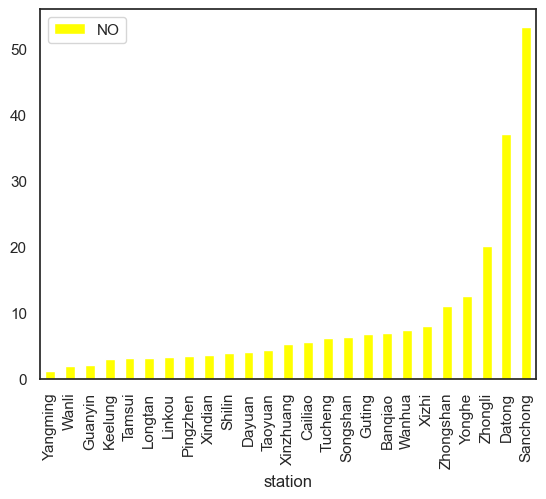

In [50]:
taiwan_air_quality[['NO', 'station']].groupby(["station"]).mean().sort_values(by='NO').plot.bar(color='yellow')
plt.show()

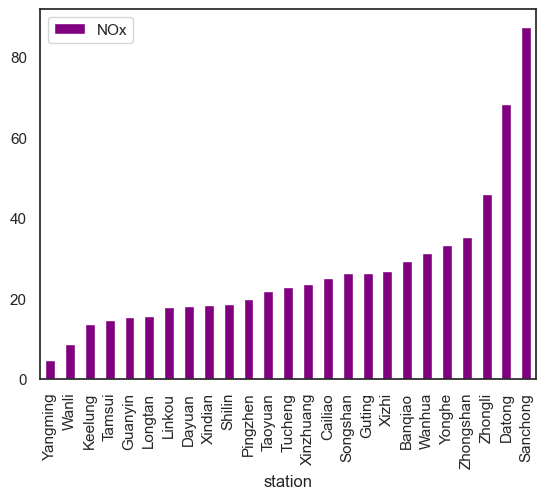

In [51]:
taiwan_air_quality[['NOx', 'station']].groupby(["station"]).mean().sort_values(by='NOx').plot.bar(color='purple')
plt.show()

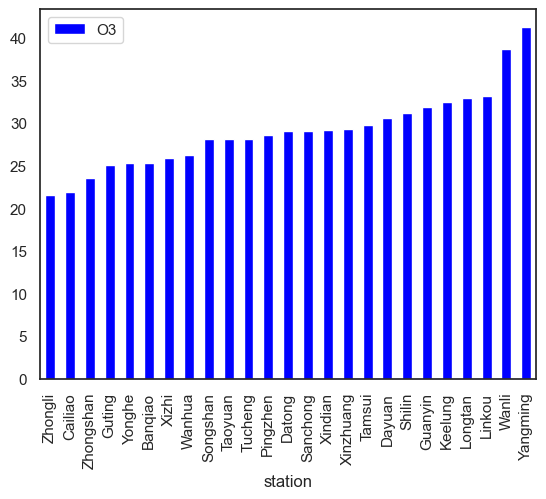

In [52]:
taiwan_air_quality[['O3', 'station']].groupby(["station"]).mean().sort_values(by='O3').plot.bar(color='blue')
plt.show()

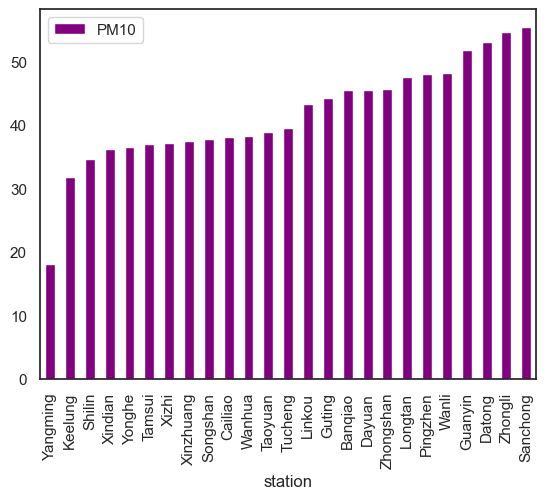

In [53]:
taiwan_air_quality[['PM10', 'station']].groupby(["station"]).mean().sort_values(by='PM10').plot.bar(color='purple')
plt.show()

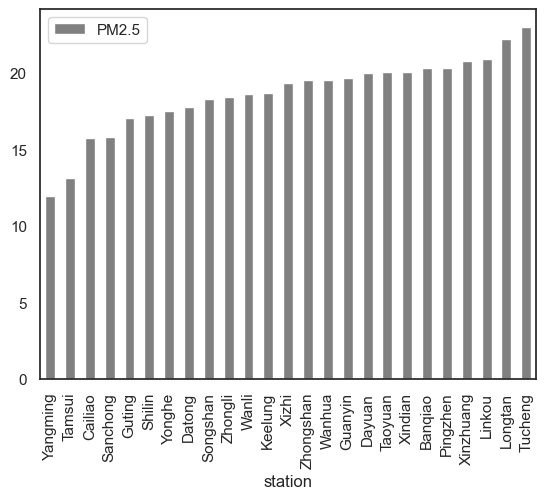

In [56]:
taiwan_air_quality[['PM2.5', 'station']].groupby(["station"]).mean().sort_values(by='PM2.5').plot.bar(color='gray')
plt.show()

In [57]:
def cal_SOi(SO2):
    si = 0
    if (SO2 <= 40):
        si = SO2 * (50/40)
    elif (SO2 > 40 and SO2 <= 80):
        si = 5 + (SO2 - 40) * (50/40)
    elif (SO2 > 80 and SO2 <= 380):
        si = 100 * (SO2 - 80) * (100/300)
    elif (SO2 > 380 and SO2 <= 800):
        si = 200 + (so2 - 380) * (100/420)
    elif (SO2 > 800 and SO2 <= 1600):
        si = 300 * (SO2 - 800) * (100/800)
    elif (SO2 > 1600):
        si = 400 + (SO2 - 1600) * (100/800)
    return si

taiwan_air_quality['Soi'] = taiwan_air_quality['SO2'].apply(cal_SOi)
data=taiwan_air_quality[['SO2', 'Soi']]
data.head()

,SO2,Soi
0,2.0,2.500
1,2.6,3.250
2,4.1,5.125
3,2.2,2.750
4,19.0,23.750


In [58]:
def cal_NOi(NO2):
    ni = 0
    if (NO2 <= 40):
        ni = NO2*50/40
    elif (NO2 > 40 and NO2 <= 80):
        ni = 50 + (NO2 - 40) * (50/40)
    elif (NO2 > 80 and NO2 <= 180):
        ni = 100 + (NO2 - 80) * (100/100)
    elif (NO2 > 180 and NO2 <= 280):
        ni = 200 + (no2 - 180) * (100/100)
    elif (NO2 >280 and NO2 <= 400):
        ni = 300 + (NO2 - 280) * (100/120)
    else:
        ni = 400 + (NO2 - 400) * (100/120)
    return ni
    
taiwan_air_quality['Noi'] = taiwan_air_quality['NO2'].apply(cal_NOi)
data=taiwan_air_quality[['NO2', 'Noi']]
data.head()

,NO2,Noi
0,14.0,17.50
1,11.0,13.75
2,23.0,28.75
3,24.0,30.00
4,46.0,57.50


In [59]:
def cal_CH4i(CH4):
    si = 0
    if (CH4 <= 500):
        si = CH4 * (50/500)
    elif (CH4 > 500 and CH4 <= 1000):
        si = CH4 * (100/500)
    elif (CH4 > 1000 and CH4 <= 2000):
        si = CH4 * (150/1000)
    elif (CH4 > 2000 and CH4 <= 4000):
        si = CH4 * (200/2000)
    elif (CH4 > 4000 and CH4 <= 5000):
        si = CH4 * (300/1000)
    elif (CH4 > 5000):
        si = CH4 * (400/1000)
    return si

taiwan_air_quality['CH4i'] = taiwan_air_quality['CH4'].apply(cal_CH4i)
data=taiwan_air_quality[['CH4', 'CH4i']]
data.head()

,CH4,CH4i
0,1.90,0.190
1,1.94,0.194
2,1.94,0.194
3,2.00,0.200
4,1.94,0.194


In [60]:
def cal_COi(CO):
    si = 0
    if (CO <= 4.4):
        si = CO * (50/4.4)
    elif (CO > 4.4 and CO <= 9.4):
        si = CO * (100/5)
    elif (CO > 9.4 and CO <= 12.4):
        si = CO * (150/3)
    elif (CO > 12.4 and CO <= 15.4):
        si = CO * (200/3)
    elif (CO > 15.4 and CO <= 30.4):
        si = CO * (300/15)
    elif (CO > 30.4):
        si = CO * (400/15)
    return si

taiwan_air_quality['COi'] = taiwan_air_quality['CO'].apply(cal_COi)
data = taiwan_air_quality[['CO', 'COi']]
data.head()

,CO,COi
0,0.78,8.863636
1,0.35,3.977273
2,0.59,6.704545
3,0.71,8.068182
4,0.45,5.113636


In [61]:
def cal_NOi(NO):
    si = 0
    if (NO <= 100):
        si = NO * (50/100)
    elif (NO > 100 and NO <= 200):
        si = NO * (50/100) + 50*(NO-100)/(200-100)
    elif (NO > 200 and NO <= 700):
        si = NO * (100/500) + 50*(NO-200)/(700-200)
    elif (NO > 700 and NO <= 1200):
        si = NO * (100/500) + 100*(NO-700)/(1200-700)
    elif (NO > 1200 and NO <= 2340):
        si = NO * (200/1140) + 100*(NO-1200)/(2340-1200)
    elif (NO > 2340):
        si = NO * (200/1140) + 200*(NO-2340)/(3090-2340)
    return si

taiwan_air_quality['NOi'] = taiwan_air_quality['NO'].apply(cal_NOi)
data = taiwan_air_quality[['NO', 'NOi']]
data.head()

,NO,NOi
0,17.0,8.50
1,2.8,1.40
2,14.0,7.00
3,1.0,0.50
4,3.1,1.55


In [62]:
def cal_O3i(O3):
    si = 0
    if (O3 <= 54):
        si = O3 * (50/54)
    elif (O3 > 54 and O3 <= 70):
        si = O3 * (50/16) - 225
    elif (O3 > 70 and O3 <= 85):
        si = O3 * (100/15) - 500
    elif (O3 > 85 and O3 <= 105):
        si = O3 * (150/20) - 750
    elif (O3 > 105 and O3 <= 200):
        si = O3 * (200/95) - 1000
    elif (O3 > 200 and O3 <= 405):
        si = O3 * (300/205) - 1400
    elif (O3 > 405):
        si = O3 * (400/200) - 2000
    return si

taiwan_air_quality['O3i'] = taiwan_air_quality['O3'].apply(cal_O3i)
data = taiwan_air_quality[['O3', 'O3i']]
data.head()

,O3,O3i
0,18.0,16.666667
1,49.0,45.370370
2,3.1,2.870370
3,20.0,18.518519
4,7.7,7.129630


In [63]:
def cal_PM10i(PM10):
    si = 0
    if (PM10 <= 54):
        si = PM10 * (50/54)
    elif (PM10 > 54 and PM10 <= 154):
        si = PM10 * (100/100)
    elif (PM10 > 154 and PM10 <= 254):
        si = PM10 * (150/100)
    elif (PM10 > 254 and PM10 <= 354):
        si = PM10 * (200/100)
    elif (PM10 > 354 and PM10 <= 424):
        si = PM10 * (300/70)
    elif (PM10 > 424):
        si = PM10 * (400/70)
    return si

taiwan_air_quality['PM10i'] = taiwan_air_quality['PM10'].apply(cal_PM10i)
data = taiwan_air_quality[['PM10', 'PM10i']]
data.head()

,PM10,PM10i
0,56.0,56.000000
1,26.0,24.074074
2,28.0,25.925926
3,38.0,35.185185
4,99.0,99.000000


In [64]:
def cal_PM25i(PM25):
    si = 0
    if (PM25 <= 12):
        si = PM25 * (50/12)
    elif (PM25 > 12 and PM25 <= 35.4):
        si = PM25 * (100/23.4)
    elif (PM25 > 35.4 and PM25 <= 55.4):
        si = PM25 * (150/20)
    elif (PM25 > 55.4 and PM25 <= 150.4):
        si = PM25 * (200/95)
    elif (PM25 > 150.4 and PM25 <= 250.4):
        si = PM25 * (300/100)
    elif (PM25 > 250.4 and PM25 <= 350.4):
        si = PM25 * (400/100)
    elif (PM25 > 350.4 and PM25 <= 500.4):
        si = PM25 * (500/150)
    return si

taiwan_air_quality['PM25i'] = taiwan_air_quality['PM2.5'].apply(cal_PM25i)
data = taiwan_air_quality[['PM2.5', 'PM25i']]
data.head()

,PM2.5,PM25i
0,19.0,81.196581
1,22.0,94.017094
2,9.0,37.500000
3,13.0,55.555556
4,38.0,285.000000


In [65]:
def cal_aqi(si, ni, coi, noi, o3i, pm10i, pm25i):
    aqi = 0
    if si > ni and si > coi and si > noi and si > o3i and si > pm10i and si > pm25i:
        aqi = si
    elif ni > si and ni > coi and ni > noi and ni > o3i and ni > pm10i and ni > pm25i:
        aqi = ni
    elif coi > si and coi > ni and coi > noi and coi > o3i and coi > pm10i and coi > pm25i:
        aqi = coi
    elif noi > si and noi > ni and noi > coi and noi > o3i and noi > pm10i and noi > pm25i:
        aqi = noi
    elif o3i > si and o3i > ni and o3i > coi and o3i > noi and o3i > pm10i and o3i > pm25i:
        aqi = o3i
    elif pm10i > si and pm10i > ni and pm10i > coi and pm10i > noi and pm10i > o3i and pm10i > pm25i:
        aqi = pm10i
    elif pm25i > si and pm25i > ni and pm25i > coi and pm25i > noi and pm25i > o3i and pm25i > pm10i:
        aqi = pm25i
    else:
        aqi = max(si, ni, coi, noi, o3i, pm10i, pm25i)
    return aqi

taiwan_air_quality['AQI'] = taiwan_air_quality.apply(lambda x: cal_aqi(x['Soi'], x['Noi'], x['COi'], x['NOi'], x['O3i'], x['PM10i'], x['PM25i']), axis=1)
data = taiwan_air_quality[['station', 'Soi', 'Noi', 'COi', 'NOi', 'O3i', 'PM10i', 'PM25i', 'AQI']]
data.head()

,station,Soi,Noi,COi,NOi,O3i,PM10i,PM25i,AQI
0,Zhongli,2.500,17.50,8.863636,8.50,16.666667,56.000000,81.196581,81.196581
1,Wanhua,3.250,13.75,3.977273,1.40,45.370370,24.074074,94.017094,94.017094
2,Tamsui,5.125,28.75,6.704545,7.00,2.870370,25.925926,37.500000,37.500000
3,Banqiao,2.750,30.00,8.068182,0.50,18.518519,35.185185,55.555556,55.555556
4,Guanyin,23.750,57.50,5.113636,1.55,7.129630,99.000000,285.000000,285.000000


In [66]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "satisfactory"
    elif x>100 and x<=200:
        return "moderate"
    elif x>200 and x<=300:
        return "poor"
    elif x>300 and x<=400:
        return "severe"
    elif x>400:
        return "hazardous" 
    
taiwan_air_quality["AQI_Range"]=taiwan_air_quality['AQI'].apply(AQI_Range)
taiwan_air_quality.head()

,time,station,CH4,CO,NO,NO2,NOx,O3,PM10,PM2.5,SO2,Soi,Noi,CH4i,COi,NOi,O3i,PM10i,PM25i,AQI,AQI_Range
0,2015/05/09 14:00,Zhongli,1.90,0.78,17.0,14.0,31.0,18.0,56.0,19.0,2.0,2.500,17.50,0.190,8.863636,8.50,16.666667,56.000000,81.196581,81.196581,satisfactory
1,2015/08/24 15:00,Wanhua,1.94,0.35,2.8,11.0,14.0,49.0,26.0,22.0,2.6,3.250,13.75,0.194,3.977273,1.40,45.370370,24.074074,94.017094,94.017094,satisfactory
2,2015/12/02 07:00,Tamsui,1.94,0.59,14.0,23.0,37.0,3.1,28.0,9.0,4.1,5.125,28.75,0.194,6.704545,7.00,2.870370,25.925926,37.500000,37.500000,Good
3,2015/10/02 21:00,Banqiao,2.00,0.71,1.0,24.0,25.0,20.0,38.0,13.0,2.2,2.750,30.00,0.200,8.068182,0.50,18.518519,35.185185,55.555556,55.555556,satisfactory
4,2015/04/17 03:00,Guanyin,1.94,0.45,3.1,46.0,49.0,7.7,99.0,38.0,19.0,23.750,57.50,0.194,5.113636,1.55,7.129630,99.000000,285.000000,285.000000,poor


In [67]:
taiwan_air_quality["AQI_Range"].value_counts()

satisfactory    3852
Good            3456
moderate        1837
severe           440
poor             371
hazardous         44
Name: AQI_Range, dtype: int64

In [68]:
X=taiwan_air_quality[['Soi','Noi','COi','NOi','O3i','PM10i','PM25i']]
Y=taiwan_air_quality['AQI']
X.head()


,Soi,Noi,COi,NOi,O3i,PM10i,PM25i
0,2.500,17.50,8.863636,8.50,16.666667,56.000000,81.196581
1,3.250,13.75,3.977273,1.40,45.370370,24.074074,94.017094
2,5.125,28.75,6.704545,7.00,2.870370,25.925926,37.500000
3,2.750,30.00,8.068182,0.50,18.518519,35.185185,55.555556
4,23.750,57.50,5.113636,1.55,7.129630,99.000000,285.000000


In [88]:
from sklearn.model_selection import train_test_split


In [76]:
X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=70)
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(8000, 7) (2000, 7) (8000,) (2000,)


In [ ]:
#linear regression

In [77]:
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [84]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [85]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test, test_pred)))
print("RMSE Training Data = ", str(RMSE_train))
print("RMSE Test Data=  ", str(RMSE_test))
print('-'*50)
print('r squared value on train', model.score(X_train, Y_train))
print('r squared value on test', model.score(X_test, Y_test))


RMSE Training Data =  9.138876762748481
RMSE Test Data=   9.46111980345262
--------------------------------------------------
r squared value on train 0.9977724411675162
r squared value on test 0.9973378490150375


In [86]:
MSE_train = metrics.mean_squared_error(Y_train, train_pred)
MSE_test = metrics.mean_squared_error(Y_test, test_pred)
print("MSE Training Data = ", str(MSE_train))
print("MSE Test Data = ", str(MSE_test))

MSE Training Data =  83.51906848470415
MSE Test Data =  89.51278793528336


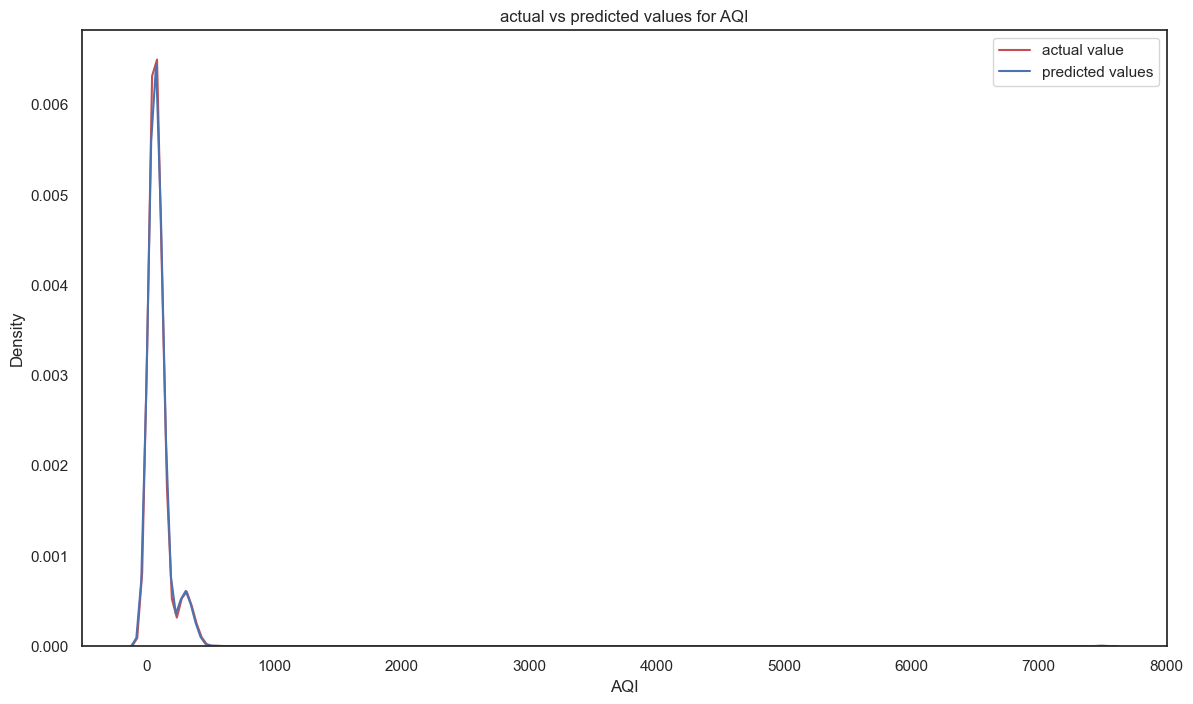

In [87]:
plt.figure(figsize=(14,8))
ax= sns.distplot(Y_test, hist=False , color="r", label="actual value ")
sns.distplot(test_pred, hist=False, color="b", label="predicted values", ax=ax)

plt.title('actual vs predicted values for AQI')
plt.legend()
plt.show()
plt.close()

In [ ]:
#Decision Tree regressor

In [89]:
DT= DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [90]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [91]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test, test_preds)))
print("RMSE Training Data = ", str(RMSE_train))
print("RMSE Test Data=  ", str(RMSE_test))
print('-'*50)
print('r squared value on train', DT.score(X_train, Y_train))
print('r squared value on test', DT.score(X_test, Y_test))

RMSE Training Data =  1.3856117809764787e-13
RMSE Test Data=   12.941668885209129
--------------------------------------------------
r squared value on train 1.0
r squared value on test 0.995018866659609


In [92]:
MSE_train = metrics.mean_squared_error(Y_train, train_pred)
MSE_test = metrics.mean_squared_error(Y_test, test_pred)
print("MSE Training Data = ", str(MSE_train))
print("MSE Test Data = ", str(MSE_test))

MSE Training Data =  83.51906848470415
MSE Test Data =  89.51278793528336


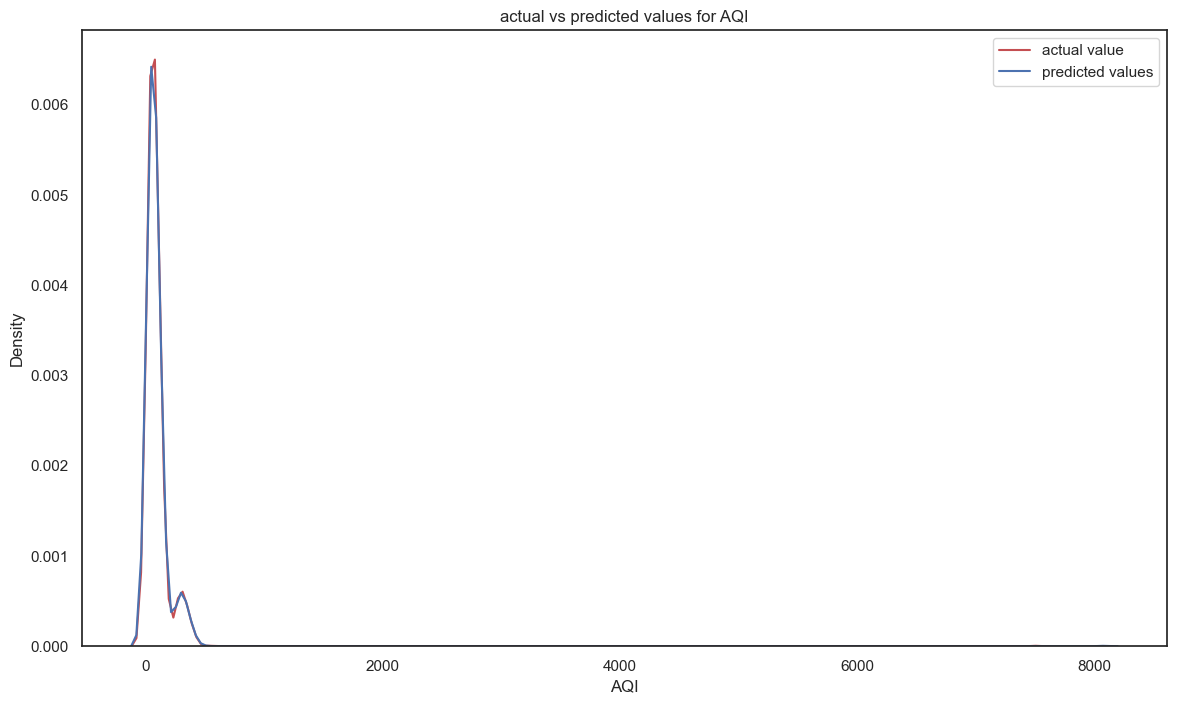

In [93]:
plt.figure(figsize=(14,8))
ax= sns.distplot(Y_test, hist=False , color="r", label="actual value ")
sns.distplot(test_preds, hist=False, color="b", label="predicted values", ax=ax)

plt.title('actual vs predicted values for AQI')
plt.legend()
plt.show()
plt.close()

In [ ]:
#Random Forest Regressor

In [94]:
RF=RandomForestRegressor().fit(X_train, Y_train)


In [95]:
train_preds1=RF.predict(X_train)
test_preds1=RF.predict(X_test)

In [96]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test, test_preds1)))
print("RMSE Training Data = ", str(RMSE_train))
print("RMSE Test Data=  ", str(RMSE_test))
print('-'*50)
print('r squared value on train', RF.score(X_train, Y_train))
print('r squared value on test', RF.score(X_test, Y_test))

RMSE Training Data =  14.415172062690568
RMSE Test Data=   10.681774499817525
--------------------------------------------------
r squared value on train 0.9944577871312515
r squared value on test 0.9966066050421779


In [97]:
MSE_train = metrics.mean_squared_error(Y_train, train_preds1)
MSE_test = metrics.mean_squared_error(Y_test, test_preds1)
print("MSE Training Data = ", str(MSE_train))
print("MSE Test Data = ", str(MSE_test))

MSE Training Data =  207.79718559697463
MSE Test Data =  114.10030646495196


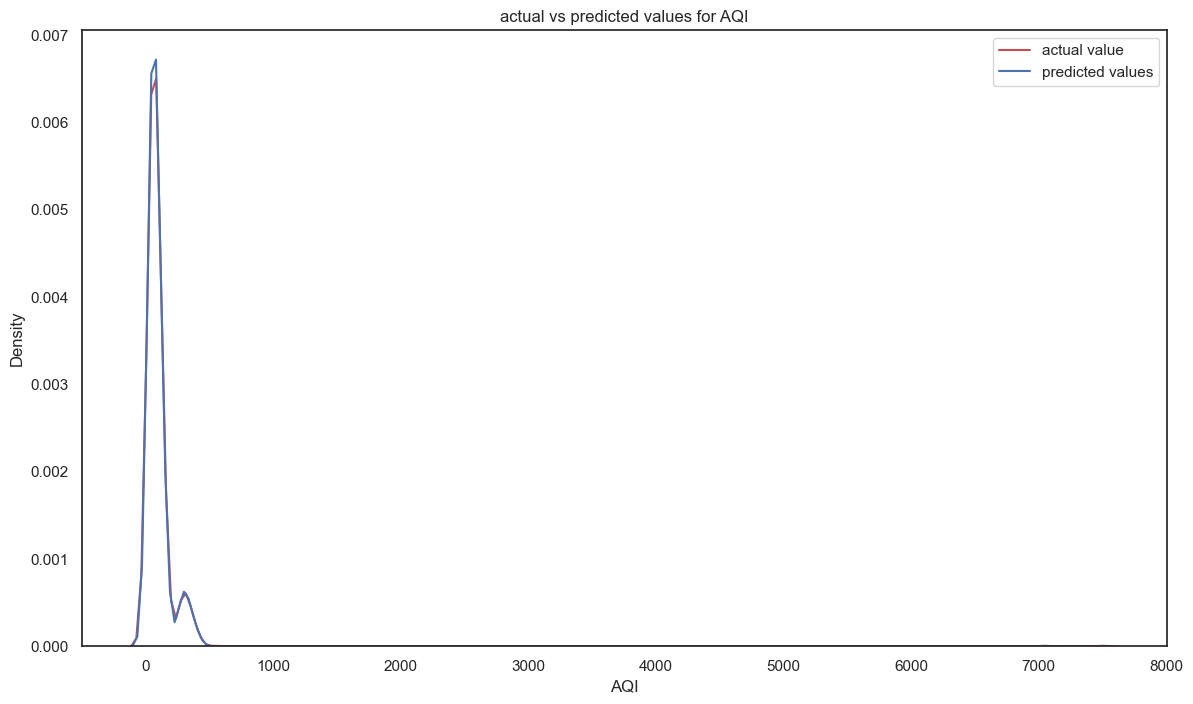

In [98]:
plt.figure(figsize=(14,8))
ax= sns.distplot(Y_test, hist=False , color="r", label="actual value ")
sns.distplot(test_preds1, hist=False, color="b", label="predicted values", ax=ax)

plt.title('actual vs predicted values for AQI')
plt.legend()
plt.show()
plt.close()

In [99]:
X2=taiwan_air_quality[['Soi','Noi','COi','NOi','O3i','PM10i','PM25i']]
Y2=taiwan_air_quality['AQI_Range']
X2.head()


,Soi,Noi,COi,NOi,O3i,PM10i,PM25i
0,2.500,17.50,8.863636,8.50,16.666667,56.000000,81.196581
1,3.250,13.75,3.977273,1.40,45.370370,24.074074,94.017094
2,5.125,28.75,6.704545,7.00,2.870370,25.925926,37.500000
3,2.750,30.00,8.068182,0.50,18.518519,35.185185,55.555556
4,23.750,57.50,5.113636,1.55,7.129630,99.000000,285.000000


In [ ]:
# K neigbors Regressor

In [100]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# create a KNN regression model with k=5
KNN_reg = KNeighborsRegressor(n_neighbors=5)

# fit the model on training data
KNN_reg.fit(X_train, Y_train)

# predict the target values for both training and test data
train_preds = KNN_reg.predict(X_train)
test_preds = KNN_reg.predict(X_test)

# calculate R-squared for both training and test data
train_r2 = r2_score(Y_train, train_preds)
test_r2 = r2_score(Y_test, test_preds)

# calculate RMSE for both training and test data
train_rmse = np.sqrt(mean_squared_error(Y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_preds))

# calculate MSE for both training and test data
train_mse = mean_squared_error(Y_train, train_preds)
test_mse = mean_squared_error(Y_test, test_preds)

print('Training R-squared:', train_r2)
print('Test R-squared:', test_r2)
print('Training RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Training MSE:', train_mse)
print('Test MSE:', test_mse)

Training R-squared: 0.9642562845655984
Test R-squared: 0.9667742985134361
Training RMSE: 36.608174787064016
Test RMSE: 33.42437381631545
Training MSE: 1340.1584612402296
Test MSE: 1117.188765012794


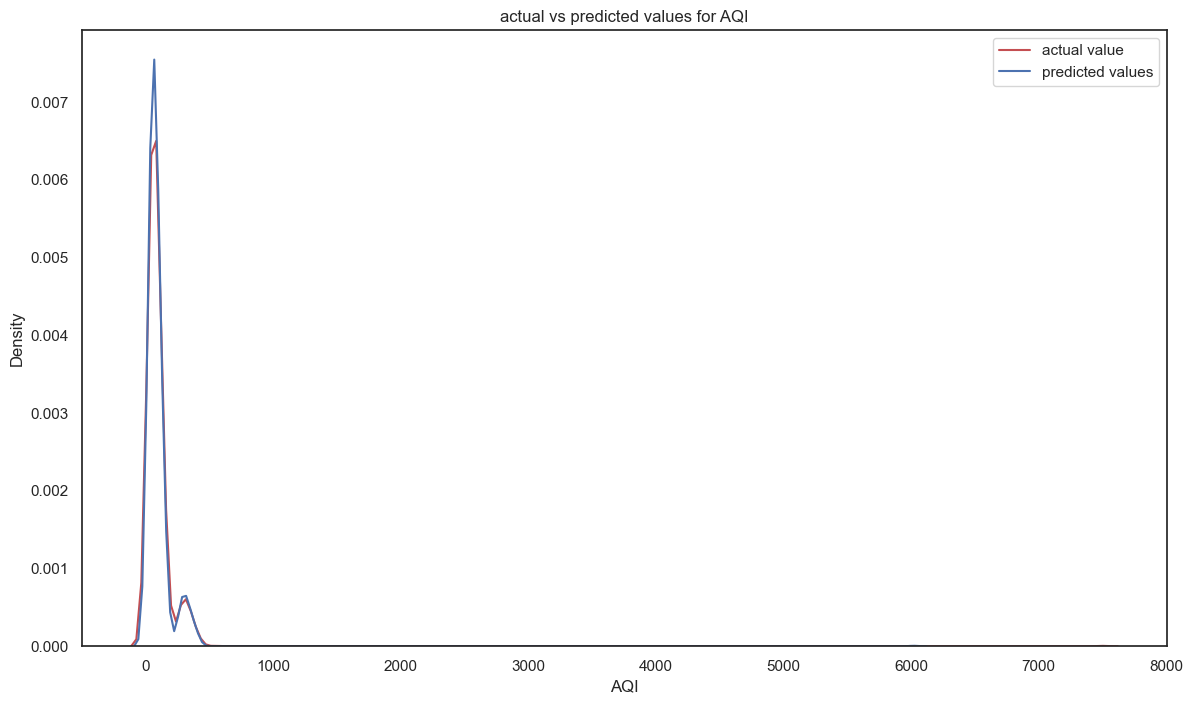

In [101]:
plt.figure(figsize=(14,8))
ax= sns.distplot(Y_test, hist=False , color="r", label="actual value ")
sns.distplot(test_preds, hist=False, color="b", label="predicted values", ax=ax)

plt.title('actual vs predicted values for AQI')
plt.legend()
plt.show()
plt.close()

In [ ]:
# Gradient boosting Regressor

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# create a Gradient Boosting regression model
GBM_reg = GradientBoostingRegressor()

# fit the model on training data
GBM_reg.fit(X_train, Y_train)

# predict the target values for both training and test data
train_preds = GBM_reg.predict(X_train)
test_preds21 = GBM_reg.predict(X_test)

# calculate R-squared for both training and test data
train_r2 = r2_score(Y_train, train_preds)
test_r2 = r2_score(Y_test, test_preds)

# calculate RMSE for both training and test data
train_rmse = np.sqrt(mean_squared_error(Y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_preds))

# calculate MSE for both training and test data
train_mse = mean_squared_error(Y_train, train_preds)
test_mse = mean_squared_error(Y_test, test_preds)

print('Training R-squared:', train_r2)
print('Test R-squared:', test_r2)
print('Training RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Training MSE:', train_mse)
print('Test MSE:', test_mse)

Training R-squared: 0.9998070646679786
Test R-squared: 0.9667742985134361
Training RMSE: 2.6895778084069444
Test RMSE: 33.42437381631545
Training MSE: 7.233828787475102
Test MSE: 1117.188765012794


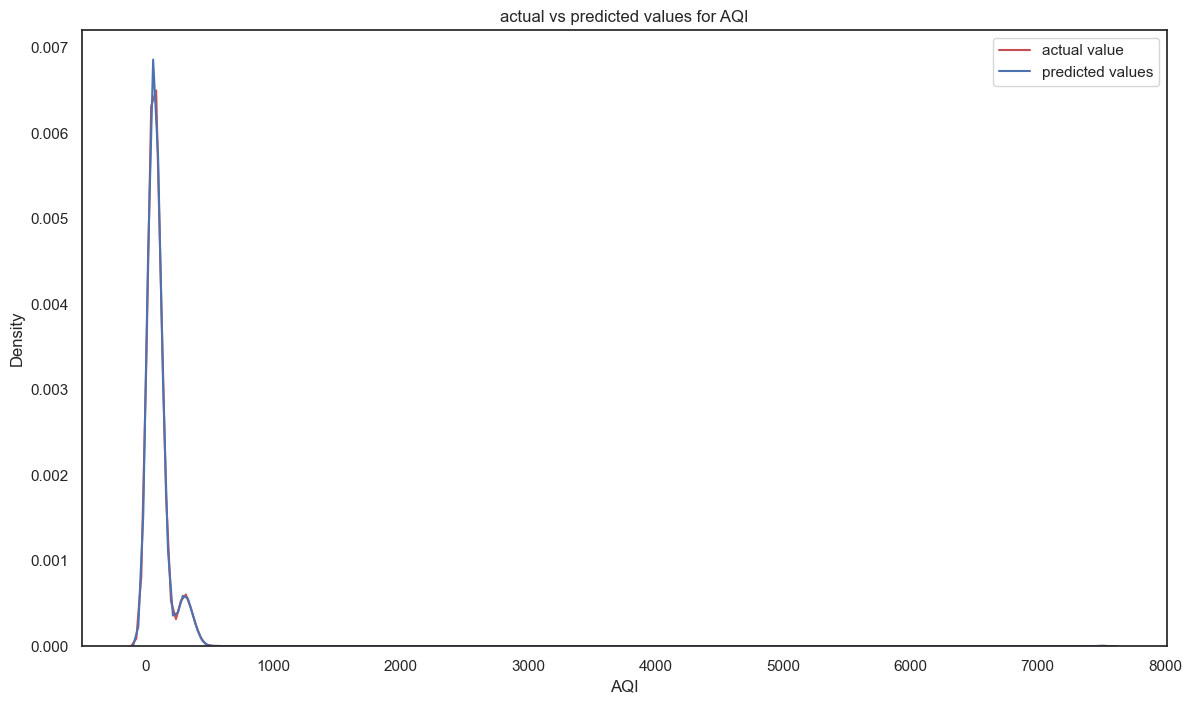

In [105]:
plt.figure(figsize=(14,8))
ax= sns.distplot(Y_test, hist=False , color="r", label="actual value ")
sns.distplot(test_preds21, hist=False, color="b", label="predicted values", ax=ax)

plt.title('actual vs predicted values for AQI')
plt.legend()
plt.show()
plt.close()